Ce notebook permet à partir de la carte des académies disponible [ici](https://www.data.gouv.fr/fr/datasets/contours-geographiques-des-academies/) de redéfinir une carte des académies française avec :

- les territoires utra-marins rapprochés de la métropole

- Saint Pierre et Miquelon effacés

In [42]:
import geopandas as gpd
import shapely.affinity
from shapely.affinity import affine_transform

In [43]:
gdf = gpd.read_file("carte.geojson")

In [79]:
gdf.head()

,libelle_aca_majuscules,code_academie,name,code_region_2016,libelle_region_2016,geometry
0,LYON,10,Lyon,84,Auvergne-et-Rhône-Alpes,"POLYGON ((3.89381 46.27427, 3.88680 46.27355, ..."
1,TOULOUSE,16,Toulouse,76,Occitanie,"MULTIPOLYGON (((1.44137 45.01525, 1.44157 45.0..."
2,VERSAILLES,25,Versailles,11,Île-de-France,"POLYGON ((1.70403 49.22903, 1.69889 49.22630, ..."
3,LIMOGES,22,Limoges,75,Nouvelle-Aquitaine,"POLYGON ((0.63133 45.71128, 0.63532 45.70815, ..."
4,DIJON,07,Dijon,27,Bourgogne-et-Franche-Comté,"POLYGON ((2.95315 48.16517, 2.95703 48.15757, ..."


<AxesSubplot:>

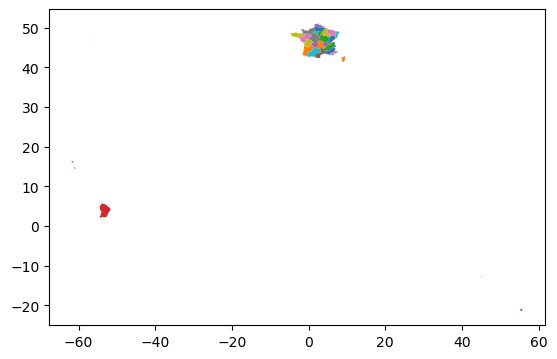

In [45]:
gdf.plot("libelle_aca_majuscules")

In [46]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
france = gdf.to_crs(epsg=3857)

<AxesSubplot:>

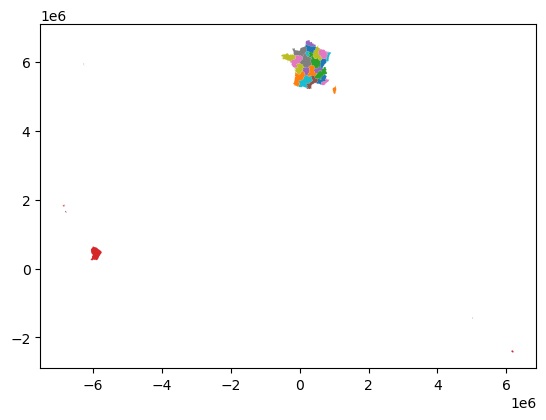

In [48]:
france.plot("libelle_aca_majuscules", legend=False)

In [80]:
france.head()

,libelle_aca_majuscules,code_academie,name,code_region_2016,libelle_region_2016,geometry
0,LYON,10,Lyon,84,Auvergne-et-Rhône-Alpes,"POLYGON ((433456.423 5824411.241, 432676.241 5..."
1,TOULOUSE,16,Toulouse,76,Occitanie,"MULTIPOLYGON (((160453.087 5623922.638, 160474..."
2,VERSAILLES,25,Versailles,11,Île-de-France,"POLYGON ((189691.385 6313812.757, 189119.347 6..."
3,LIMOGES,22,Limoges,75,Nouvelle-Aquitaine,"POLYGON ((70279.434 5734201.996, 70723.555 573..."
4,DIJON,07,Dijon,27,Bourgogne-et-Franche-Comté,"POLYGON ((328742.976 6134377.441, 329175.074 6..."


In [50]:
guyane = france.loc[19,"geometry"]

In [51]:
guyane_shift = shapely.affinity.translate(guyane, xoff=5760000, yoff=4520000) #rapproche la Guyane

In [52]:
france_test = france
france_test.loc[19, "geometry"] = guyane_shift

<AxesSubplot:>

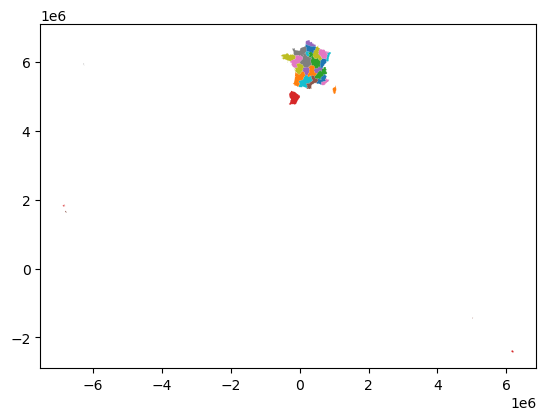

In [55]:
france_test.plot("libelle_aca_majuscules", legend=False)

<AxesSubplot:>

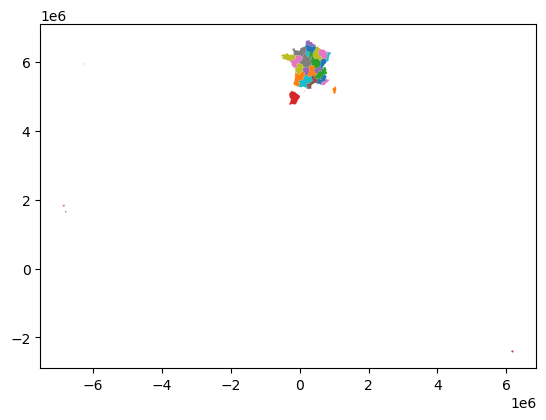

In [56]:
mayotte = france.loc[29]["geometry"]
mayotte_shift = shapely.affinity.translate(mayotte, xoff=-4885000, yoff=6590000) #rapproche Mayotte
france_test.loc[29, "geometry"] = mayotte_shift
france_test.plot("libelle_aca_majuscules", legend=False)

<AxesSubplot:>

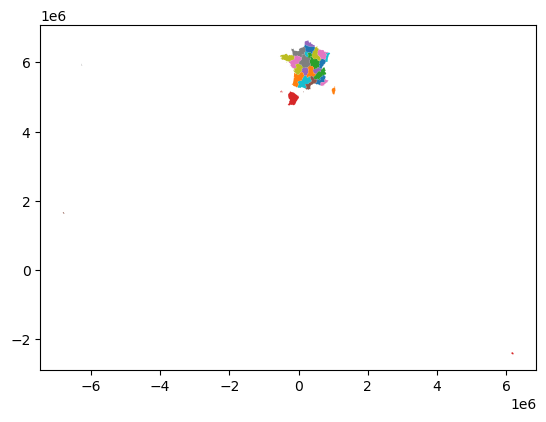

In [57]:
guadeloupe = france.loc[15]["geometry"]
guadeloupe_shift = shapely.affinity.translate(guadeloupe, xoff=6355000, yoff=3330000) #rapproche la Guadeloupe
france_test.loc[15, "geometry"]= guadeloupe_shift
france_test.plot("libelle_aca_majuscules", legend=False)

<AxesSubplot:>

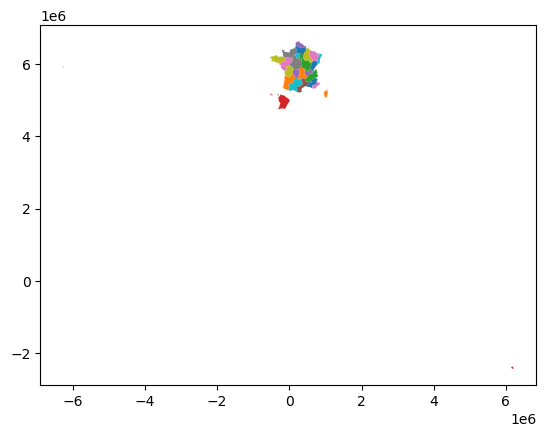

In [58]:
martinique = france.loc[27]["geometry"]
martinique_shift = shapely.affinity.translate(martinique, xoff=6480000, yoff=3505000) #rapproche la Martinique
france_test.loc[27, "geometry"] = martinique_shift
france_test.plot("libelle_aca_majuscules", legend=False)

<AxesSubplot:>

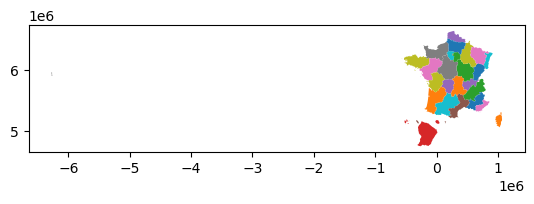

In [59]:
reunion = france.loc[22]["geometry"]
reunion_shift = shapely.affinity.translate(reunion, xoff=-6170000, yoff =7560000 ) #rapproche la Réunion
france_test.loc[22, "geometry"] = reunion_shift
france_test.plot("libelle_aca_majuscules")

In [60]:
france_test.to_file("france_academies.geojson", driver='GeoJSON')

In [61]:
france.loc[13]

libelle_aca_majuscules                                            NORMANDIE
code_academie                                                            70
name                                                              Normandie
code_region_2016                                                         28
libelle_region_2016                                               Normandie
geometry                  MULTIPOLYGON (((-6278564.196453744 5914387.198...
Name: 13, dtype: object

In [62]:
# diviser le multipolygon
import json

js = open('france_academies.geojson', 'r').read()
gj = json.loads(js)

output = { "type": "FeatureCollection", "features": [] }

for feature in gj['features']:
    if (feature['geometry'] is not None) and (feature['geometry']['type'] == 'MultiPolygon'):
        for poly in feature['geometry']['coordinates']:
            xfeature = { "type": "Feature", "properties": {}, "geometry": { "type": "Polygon" } }
            xfeature['geometry']['coordinates'] = poly
            output['features'].append(xfeature)

open('polygons.geojson', 'w').write(json.dumps(output))

1223931

In [63]:
temp = gpd.read_file("polygons.geojson")

In [65]:
temp.cx[:-540000, :] #limite pour ne garder que les polygone à l'ouest


,geometry
8,"POLYGON ((-572112.63026 6182135.47444, -571294..."
19,"POLYGON ((-555038.99223 6176125.11536, -554431..."
20,"POLYGON ((-541971.73154 6113459.07986, -541273..."
26,"POLYGON ((-540684.35502 6164030.40120, -540797..."
31,"POLYGON ((-550077.89440 6168846.65708, -549582..."
33,"POLYGON ((-567312.64514 6186699.19603, -566711..."
35,"POLYGON ((-546469.50651 6169039.43626, -546037..."
40,"POLYGON ((-552786.74289 6173050.05998, -552815..."
56,"POLYGON ((-550959.99005 6173556.91731, -550599..."
65,"POLYGON ((-6278564.19645 5914387.19850, -62782..."


### supprimer les polygone de St Pierre et Miquelon

In [66]:
result = france_test[france_test["libelle_aca_majuscules"]=="NORMANDIE"]["geometry"].difference(temp.cx[:-540000, :].loc[8]["geometry"])

In [67]:
result = result.difference(temp.cx[:-540000, :].loc[19]["geometry"])

In [68]:
result = result.difference(temp.cx[:-540000, :].loc[20]["geometry"]).difference(temp.cx[:-540000, :].loc[26]["geometry"]).difference(temp.cx[:-540000, :].loc[31]["geometry"])

In [69]:
result = result.difference(temp.cx[:-540000, :].loc[33]["geometry"]).difference(temp.cx[:-540000, :].loc[35]["geometry"])

In [70]:
result = result.difference(temp.cx[:-540000, :].loc[40]["geometry"]).difference(temp.cx[:-540000, :].loc[56]["geometry"]).difference(temp.cx[:-540000, :].loc[65]["geometry"])

In [71]:
result = result.difference(temp.cx[:-540000, :].loc[66]["geometry"]).difference(temp.cx[:-540000, :].loc[67]["geometry"]).difference(temp.cx[:-540000, :].loc[70]["geometry"])

<AxesSubplot:>

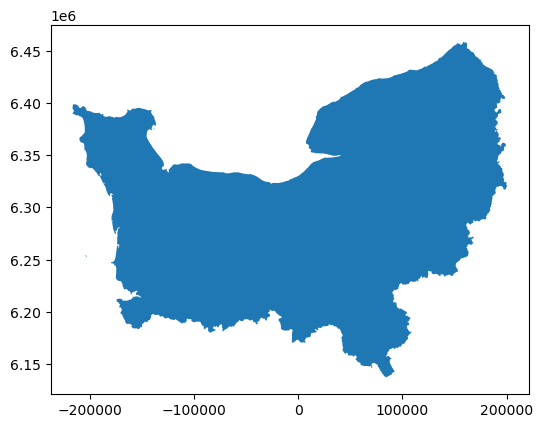

In [72]:
result.plot()

In [73]:
france_test.loc[france_test["libelle_aca_majuscules"]=="NORMANDIE", "geometry"]=result

<AxesSubplot:>

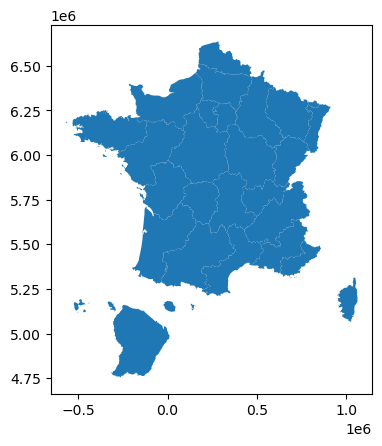

In [74]:
france_test.plot()

In [39]:
# france_test.loc[france_test["libelle_aca_majuscules"]=="GUYANE","geometry"] = france_test.loc[france_test["libelle_aca_majuscules"]=="GUYANE"]["geometry"].scale(xfact=0.5, yfact=0.5, zfact=1.0)

In [76]:
france_test = france_test.to_crs(epsg=4326) #passage à un encodage plus communément accepté


In [78]:
france_test.to_file("france_academies.geojson", driver='GeoJSON')